<a href="https://colab.research.google.com/github/ImtiyazAnsari1223/Online_Retail_Customer_Segmentation_Unsupervised/blob/main/Retail_Customer_Segmentation_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Online Retail Customer Segmentation Unsupervised

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 -** IMTIYAZ ANSARI




# **Project Summary -**
In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **GitHub Link -**

# **Problem Statement**

* A primary goal for any company and business is to understand their targeted customers.
* How their consumers operate and use their services.
* Every consumer may use a companies services differently.
* The problem we’re trying to solve is to define this delivery company’s consumers.
* To define certain behaviors and methods these consumers use the companies services for.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv')

### Dataset First look

In [4]:
# Dataset First five row look from upper
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [5]:
df.shape

(541909, 8)

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
df.duplicated().sum()

5268

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

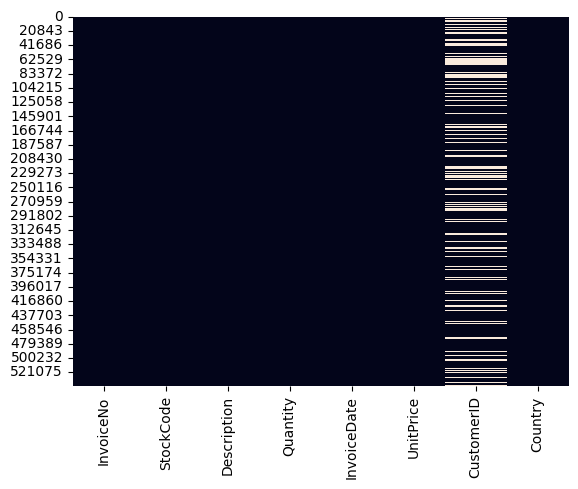

In [9]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

###  About dataset:-

* In our data set there are some duplicate values present.
* some missing values present.

## ***2. Understanding Your Variables***

### Data Wrangling Code

In [10]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  5268


In [11]:
# Dropping Duplicate Rows
df=df.drop_duplicates()
len(df[df.duplicated()])

0

In [12]:
# after removing duplicates checking data shape
df.shape

(536641, 8)

In [13]:
# we have to drop some InvoiceNo which are starts with 'C' because 'C' indicates a cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [14]:
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [15]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [16]:
# after droping cancelled products, the data shape
df.shape

(527390, 8)

In [17]:
# seeing all columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
# convert invoice Data column into 'year','month','day','hour','minute','second'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day
df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
df['InvoiceDate_second'] = df['InvoiceDate'].dt.second

In [19]:
# checking all columns and data types
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


### What all manipulations have I done and insights I found?

* There was some duplicate values so i removed those values.
* I dropped InvoiceNo column which are starts with 'c' because 'c', it indicates a cancellation.
* I converted invoice Data column into 'year','month','day','hour','minute','second'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- **Bar plot between customer_id corresponding to their count**

In [20]:
# Chart - 1 visualization code
# I have a certain amount of rows. Let us check if each row has a single customer or not. If not than how many customer ids I have.

# let me see the unique ids of customers
print('The no. of customers = ',df['CustomerID'].nunique())

The no. of customers =  4339


In [21]:
# So I have around 392732 rows but only 4339 customers. Let me now see who is most active customer.

# finding most active customer
active_customers=pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers


,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677
...,...,...
4334,16990.0,1
4335,13302.0,1
4336,13017.0,1
4337,17923.0,1


In [22]:
# top 5
active_customers.head()

,CustomerID,Count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


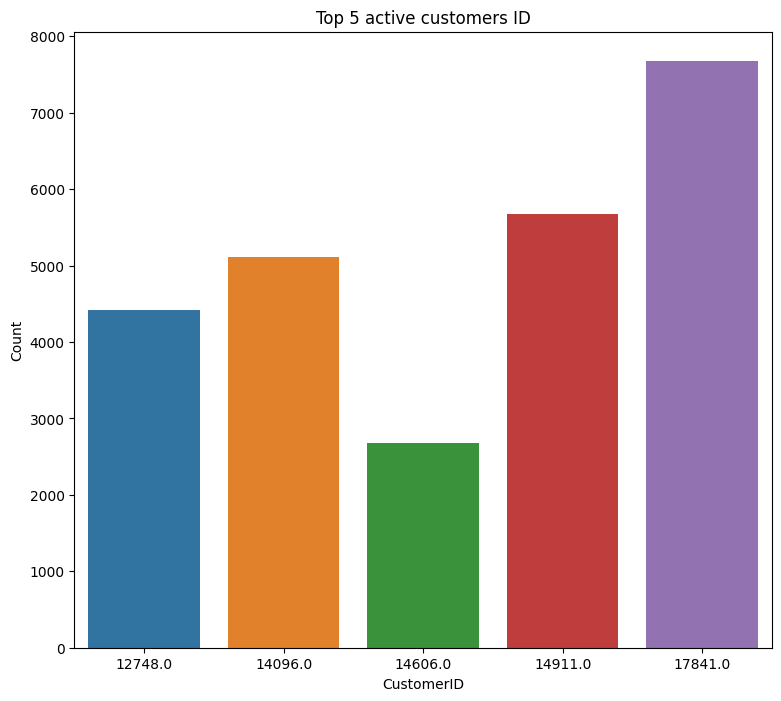

In [23]:
# visualizing bar chat of top 5 customers
plt.figure(figsize=(9,8))
plt.title('Top 5 active customers ID')
sns.barplot(x='CustomerID',y='Count',data=active_customers[:5])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* The top 5 most active customers that have been regularly purchasing are having ids 17841, 14911, 14096, 12748, 14606.
* These customers can be considered as special customeres because it is very likely that they would buy more often.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Positive business growth:
* we can identify most active customer and company can focus on those customers.
* If company can focus its efforts on nurturing and retaining these customers due to this repeat purchase increases so revenue increases.

#### Chart - 2- **Bar Plot for top 5 product**

In [24]:
# Chart - 2 visualization code

# Analysis of Categorical Features

categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [25]:
# Analysis of Description Variable

Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [26]:
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2315
1,JUMBO BAG RED RETROSPOT,2112
2,REGENCY CAKESTAND 3 TIER,2009
3,PARTY BUNTING,1700
4,LUNCH BAG RED RETROSPOT,1581


In [27]:
Description_df.tail()

,Description_Name,Count
4202,TINY CRYSTAL BRACELET RED,1
4203,4 GOLD FLOCK CHRISTMAS BALLS,1
4204,ZINC STAR T-LIGHT HOLDER,1
4205,BLUE GINGHAM ROSE CUSHION COVER,1
4206,"PAPER CRAFT , LITTLE BIRDIE",1


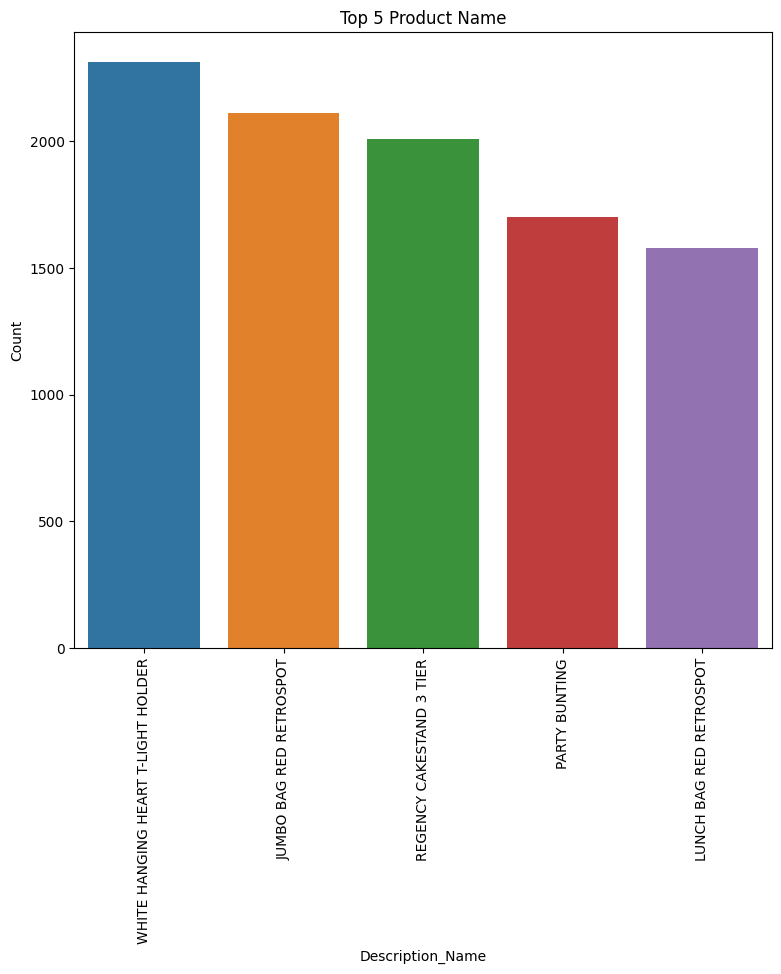

In [28]:
plt.figure(figsize=(9,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?


Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product almost 2018 units were sold.
* REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Insights which will create positive business impact:
* The high counts of these top products suggest a strong demand or popularity among customers.
* This information can be utilized to ensure adequate stock availability, plan targeted promotions,so due to this product sells increases and revenue increases.

#### Chart - 3- **Bar plot to show Bottom 5 product name**

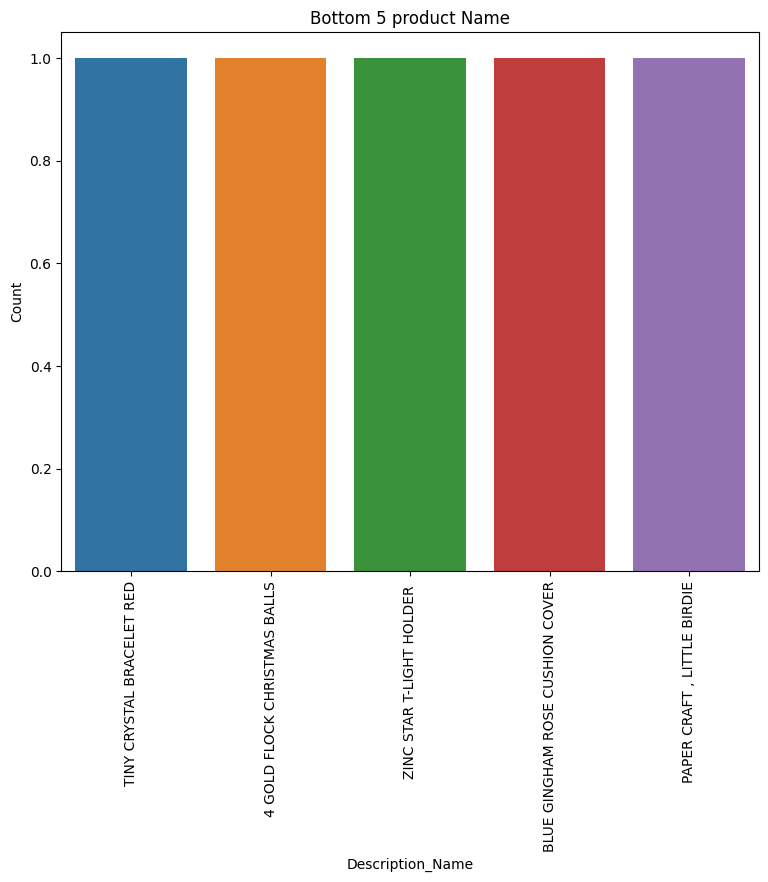

In [29]:
plt.figure(figsize=(9,7))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* Bar chart draw variables in one axis and corresponding values in another axis.
* Here i want to know counts of different product thats why i used bar plot.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* It has been observed that "TINY CRYSTAL BRACELET RED," "4 GOLD FLOCK CHRISTMAS BALLS," "ZINC STAR T-LIGHT HOLDER," "BLUE GINGHAM ROSE CUSHION COVER," and "PAPER CRAFT, LITTLE BIRDIE," have very low counts, indicating a limited demand or popularity among customers.

#### Chart - 4-**Bar plot between top 5 stockname corresponding to their count**

In [30]:
# Chart - 4 visualization code
# Analysis of StockCode Variable
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)

In [31]:
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2259
1,85099B,2112
2,22423,2012
3,47566,1700
4,20725,1582


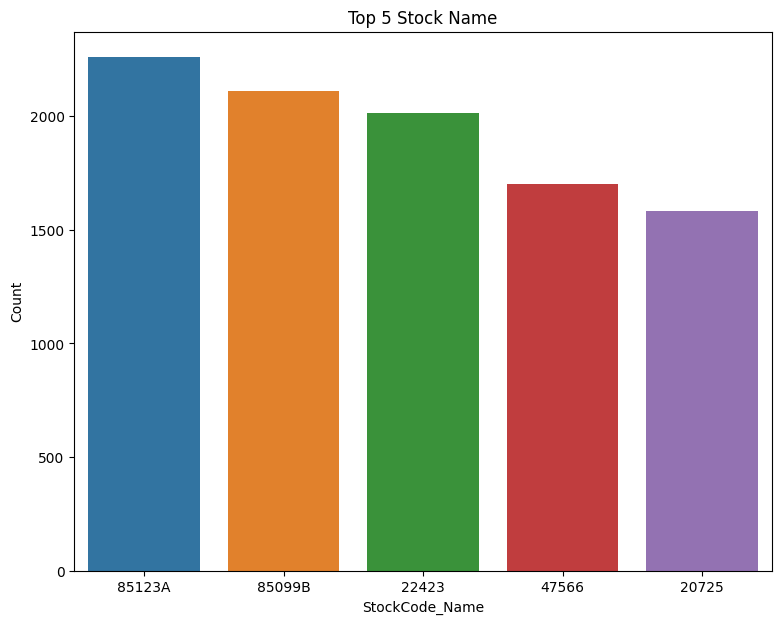

In [32]:
plt.figure(figsize=(9,7))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* StockCode-85123Ais the first highest selling product.
* StockCode-22423 is the 2nd highest selling product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Insights helps to create positive business growth:
 * By analyzing demand for these top stock codes, the company can make data-driven decisions regarding procurement, production, and restocking.
 * This can help optimize sales, reduce excess inventory, and improve overall revenue and profitability.
 * By ensuring the availability of popular stock codes, the company can meet customer demand and enhance customer satisfaction.

#### Chart - 5-**Bar plot between top 5 Bottom stockname corresponding to their count**

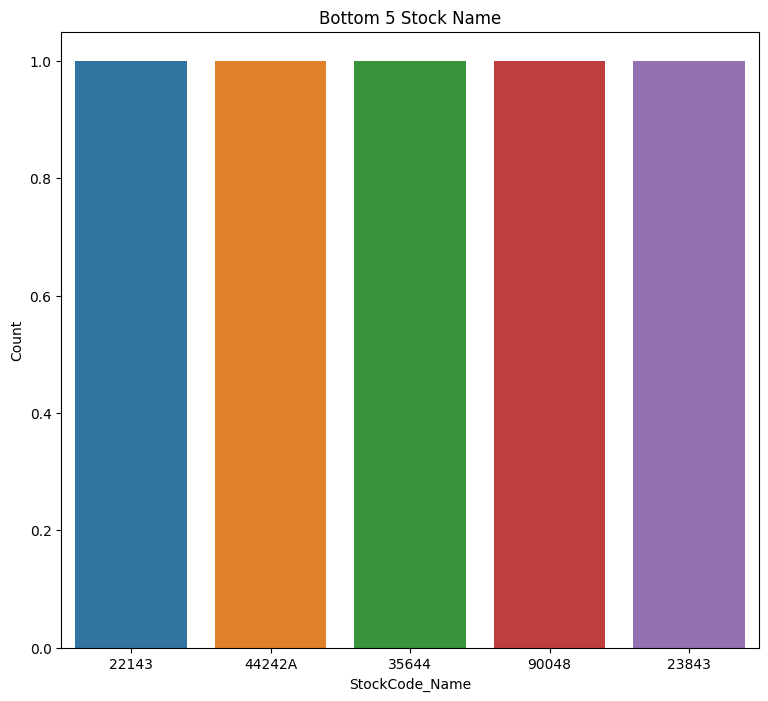

In [33]:
# Chart - 5 visualization code

plt.figure(figsize=(9,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* These stock codes, represented by the bottom 5 names, have the least occurrence among all the stock codes.
* The low counts of these bottom stock codes suggest a limited demand or popularity among customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
It has been observed that gained insights help to create positive business impact:
* By identifying the least popular stock codes, the company can optimize its inventory management.and instead of these product company focuses on high demand product so reveue increases.

#### Chart - 6-**Bar plot to show Top 5 Country based on the Most Numbers Customers**

In [34]:
# Chart - 6 visualization code
# Analysis of country Variable

country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

In [35]:
country_df.head()

,Country_Name,Count
0,United Kingdom,482479
1,Germany,9027
2,France,8393
3,EIRE,7883
4,Spain,2480


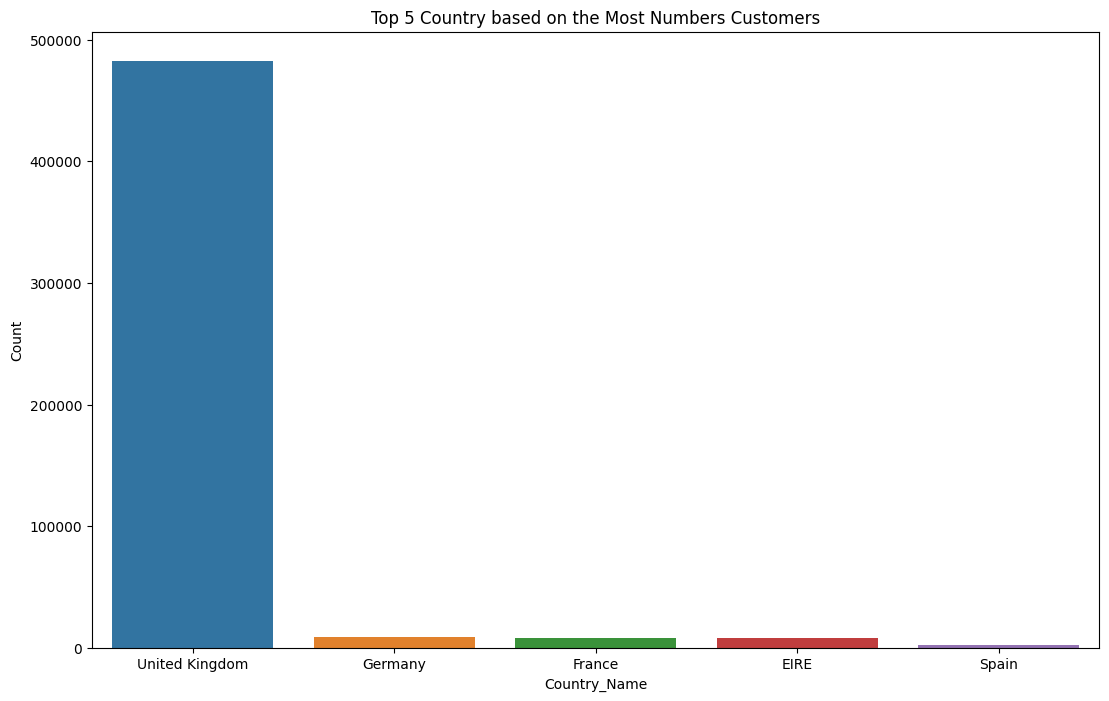

In [36]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is the best option.
* For doing comparision on categorical variables Bar chart is the best.
* Here we draw in different countries average no of customer thats why used bar chart.


##### 2. What is/are the insight(s) found from the chart?

Ans :-
* It has been observed that UK has highest number of customers.
* Germany,France and IreLand has almost equal number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
We have to take some decision on the basis of insights which we found from the chart.so we can create positive impact on business.
*  By identifying the countries with the highest number of customers, the company can focus its marketing efforts and allocate resources to these countries.
* This can result in targeted marketing campaigns, improved customer engagement, and increased sales in these key markets.

#### Chart - 7-**Bar plot to show Top 5 Country based least Numbers of  Customers**

<Axes: title={'center': 'Top 5 Country based least Numbers of  Customers'}, xlabel='Country_Name', ylabel='Count'>

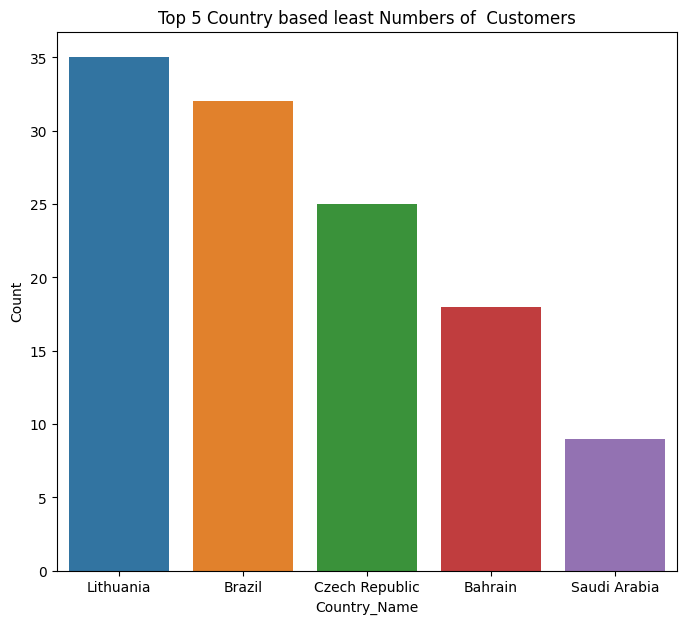

In [37]:
# Chart - 7 visualization code

plt.figure(figsize=(8,7))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

##### 1. Why did I pick the specific chart?

Ans :-
* For categorical variables Bar chart is best option.
* For doing comparision on categorical variables Bar chart is best.
* Here we draw average no of customer in different countries from the bottom.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* There are very less customers from Saudi Arabia.
* Bahrain is the 2nd Country having least number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
The insights gained from understanding the challenges or barriers in certain countries can guide the company in developing targeted strategies to penetrate these markets. By addressing the specific challenges and adapting the business approach accordingly, the company can overcome barriers, attract more customers, and achieve business growth.

#### Chart - 8-**Plot histogram for each numerical columns to check data distribution**

In [38]:
# Chart - 8 visualization code

# Analysis Numeric Features

numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

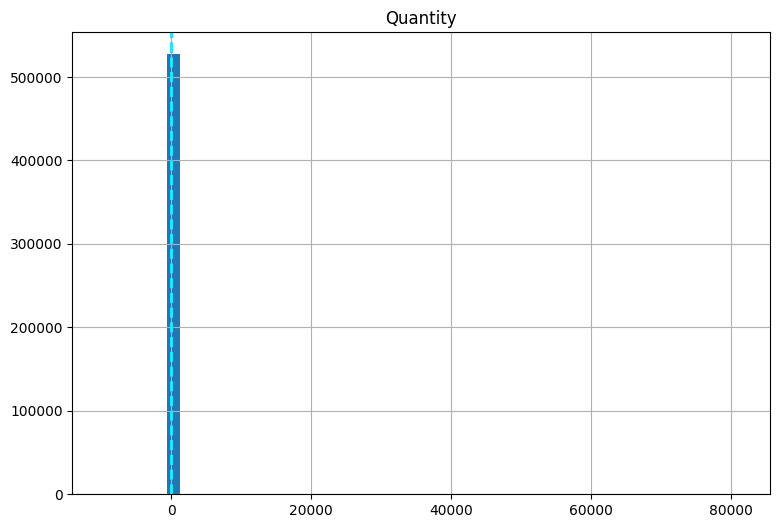

Skewness : 432.0874883289716
Kurtosis : 210393.63431854208


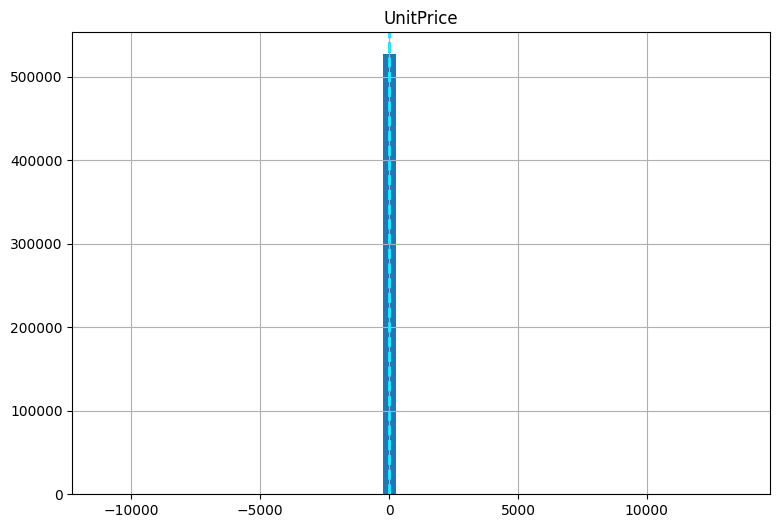

Skewness : 60.331902476539724
Kurtosis : 52037.4702051662


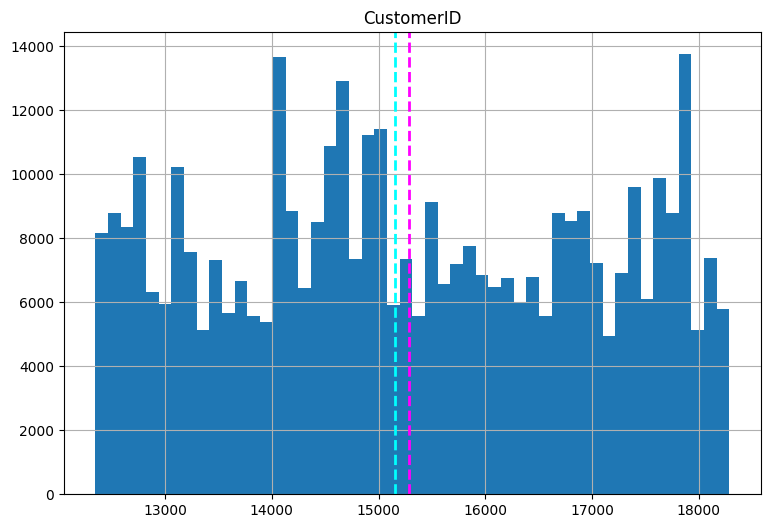

Skewness : 0.030195360172134714
Kurtosis : -1.1807001644923927


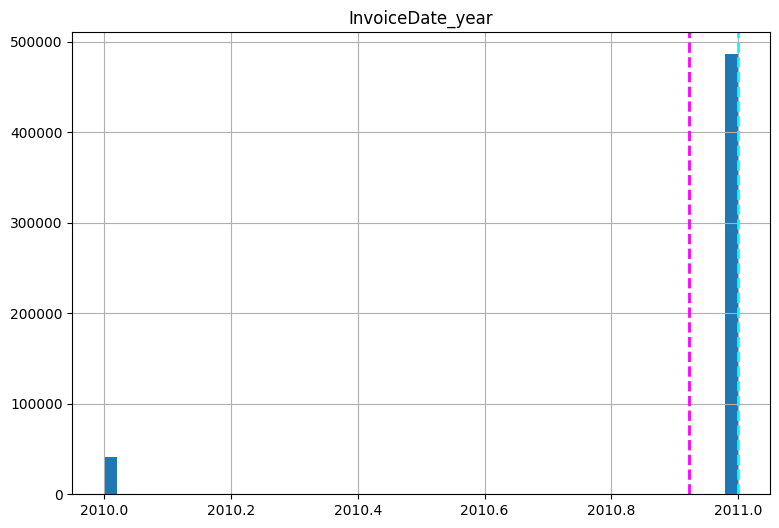

Skewness : -3.1410872118025477
Kurtosis : 7.8664587037909275


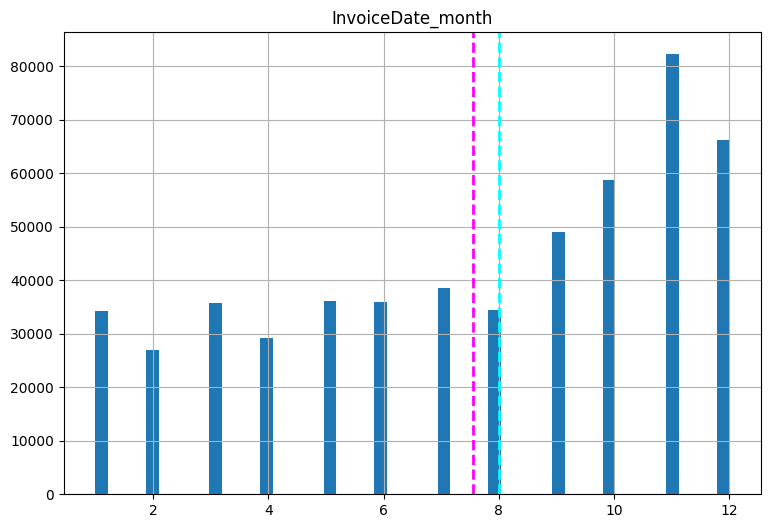

Skewness : -0.4129104908067327
Kurtosis : -1.1205500794487395


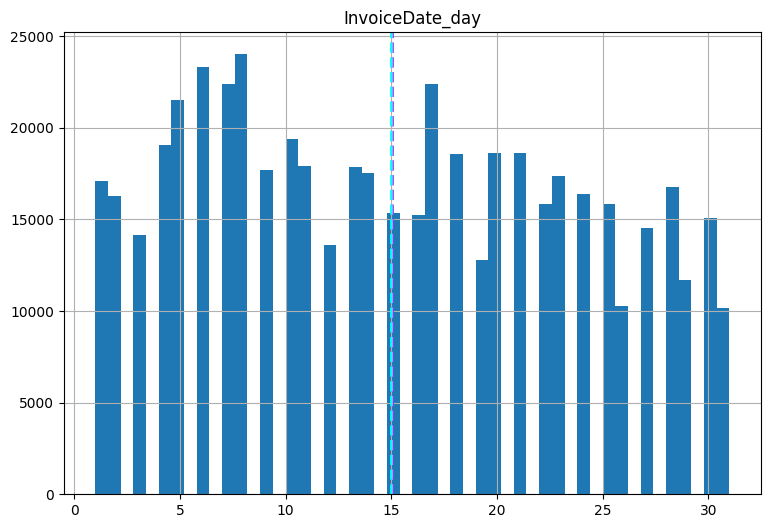

Skewness : 0.14176963685877902
Kurtosis : -1.1577908464184032


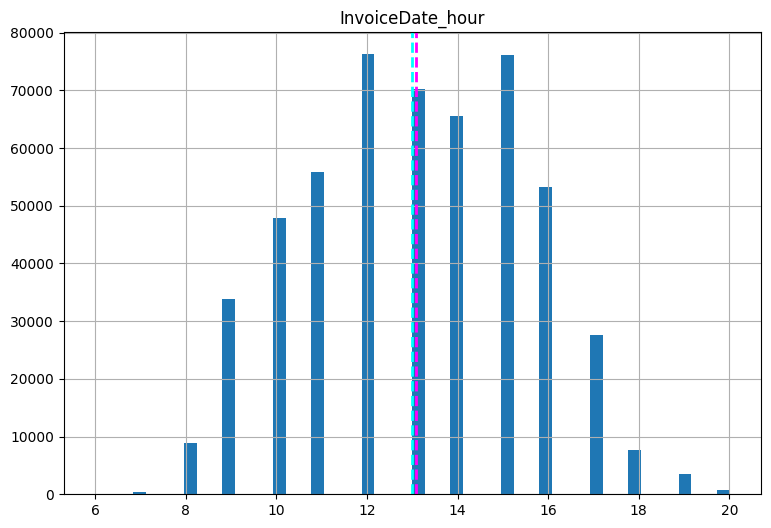

Skewness : -0.002559980105483245
Kurtosis : -0.6994614443969667


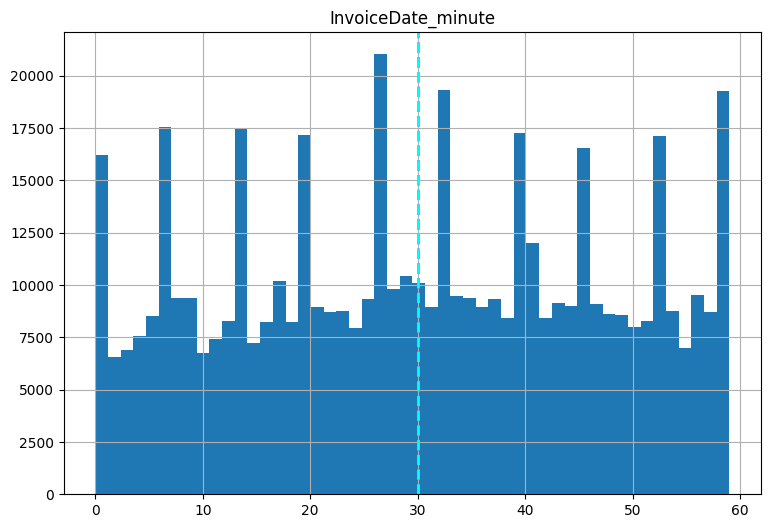

Skewness : -0.025902783892299018
Kurtosis : -1.1355483425798367


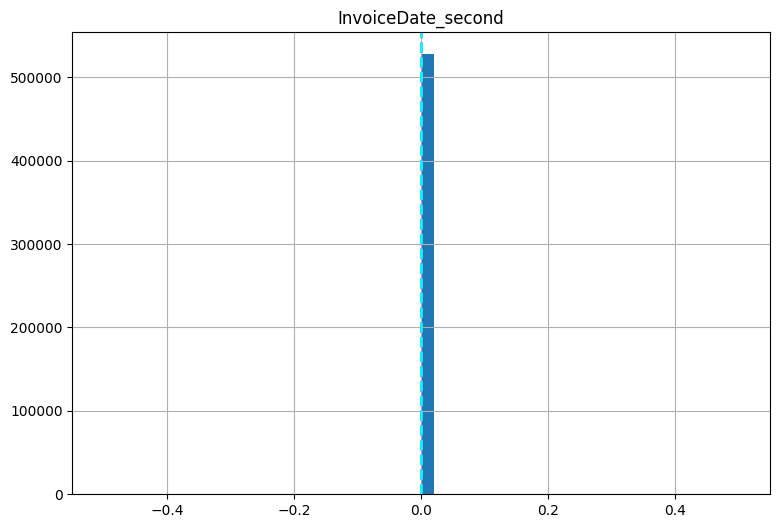

Skewness : 0
Kurtosis : 0


In [39]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

##### 1. Why did I pick the specific chart?

Ans :-
* histogram is a suitable choice for visualizing the distribution of numerical data.
*  Histograms allow us to visualize how the data is distributed across different ranges or bins.
* It provides insights into the frequency or count of data points within each bin, giving a sense of the data's distribution pattern.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* It has been observed that some of the data are almost normally distributed.
* some are positively distributed and some are highly positively distributed.
* some are negatively distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Gained insights help to create positive business impact:
* By understanding the distribution of data it help to taking decision-making and improved strategies in various business areas, such as marketing, sales, and operations.
* By detecting and addressing outliers, businesses can improve data quality, enhance decision-making accuracy.

#### Chart - 9-**Plot boxplot on each numerical columns to check outliers**

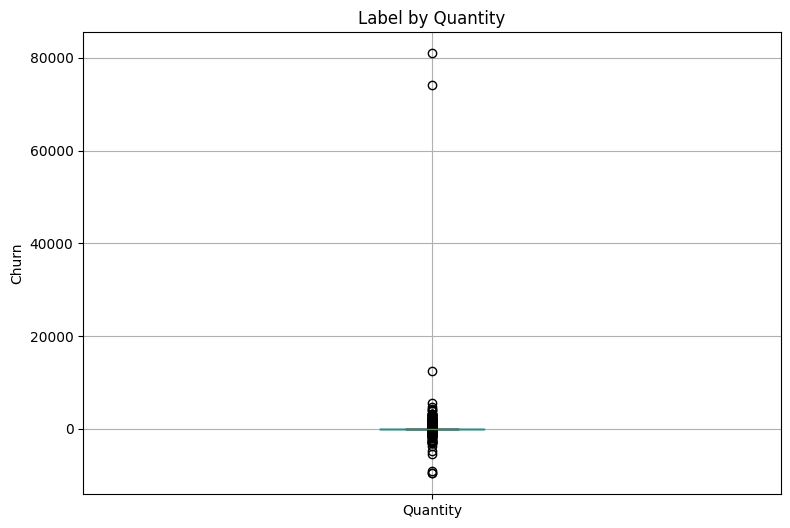

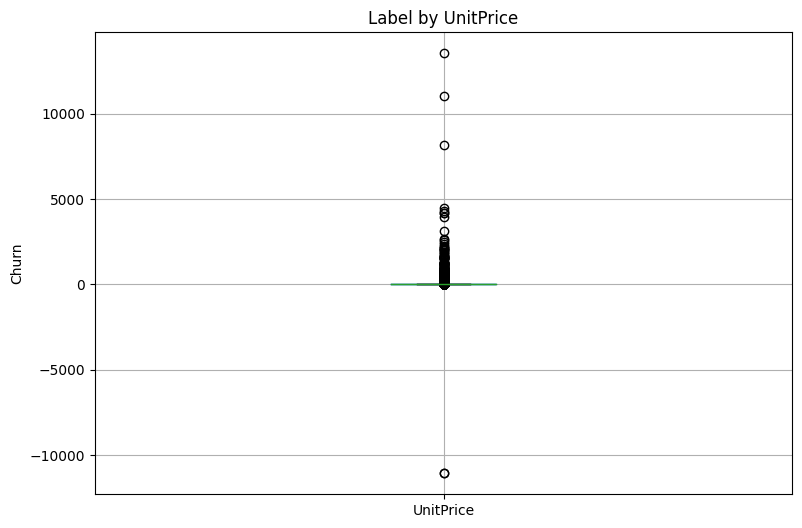

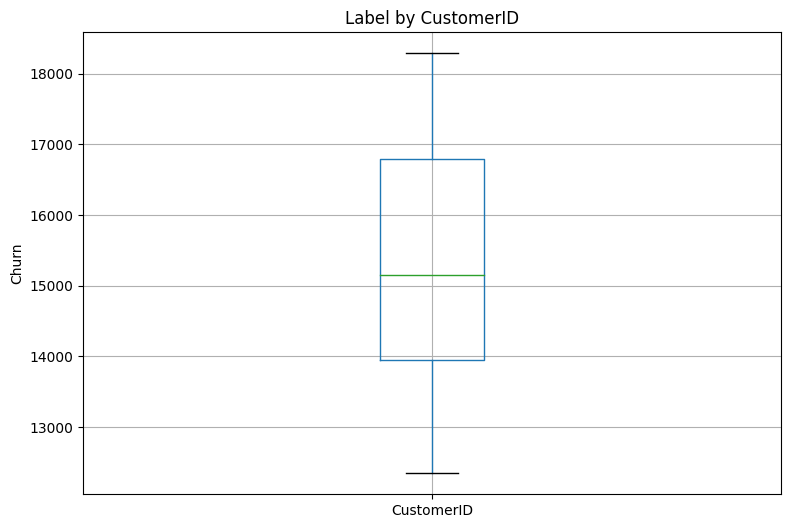

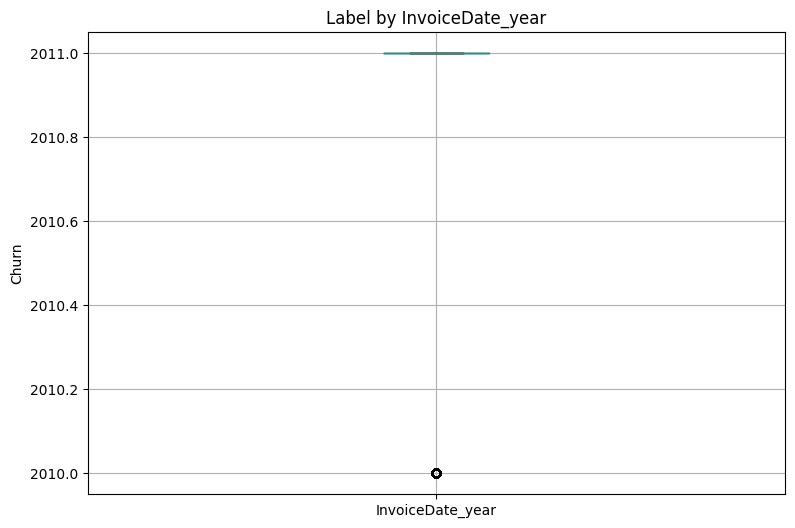

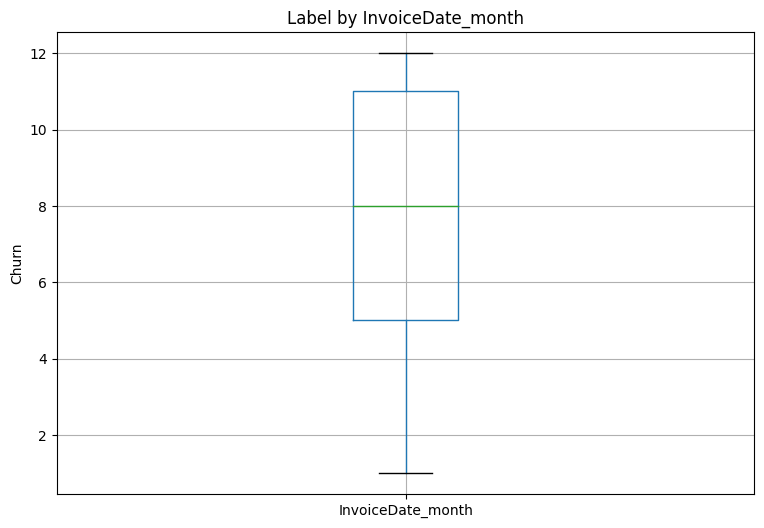

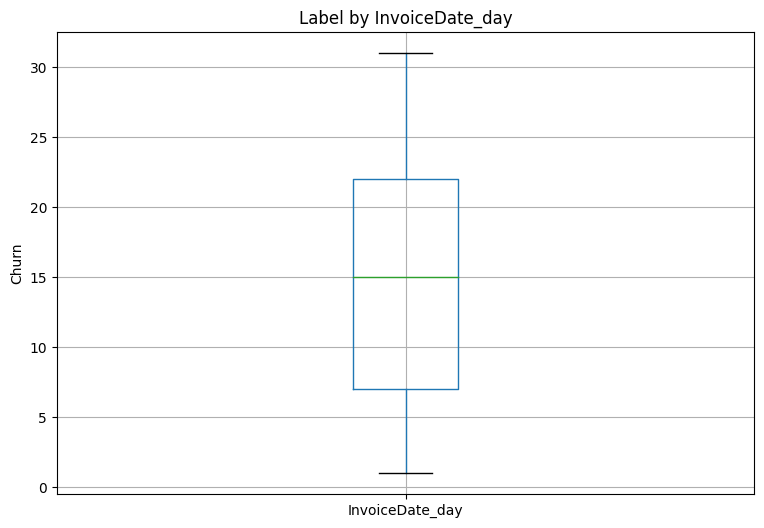

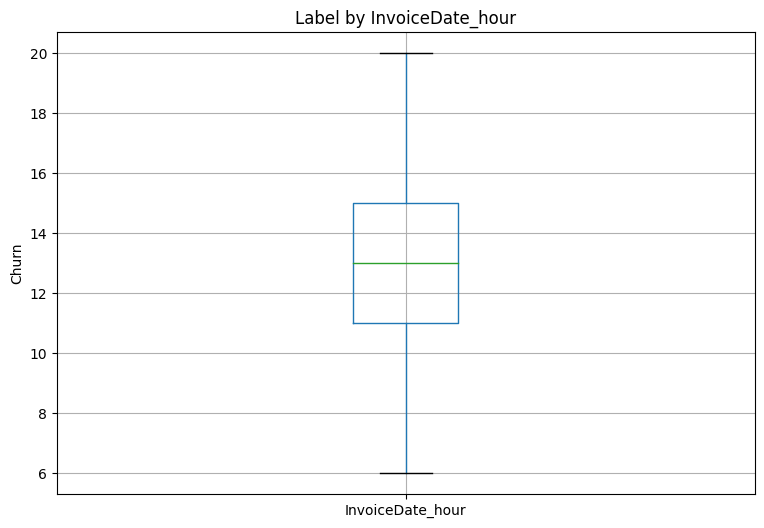

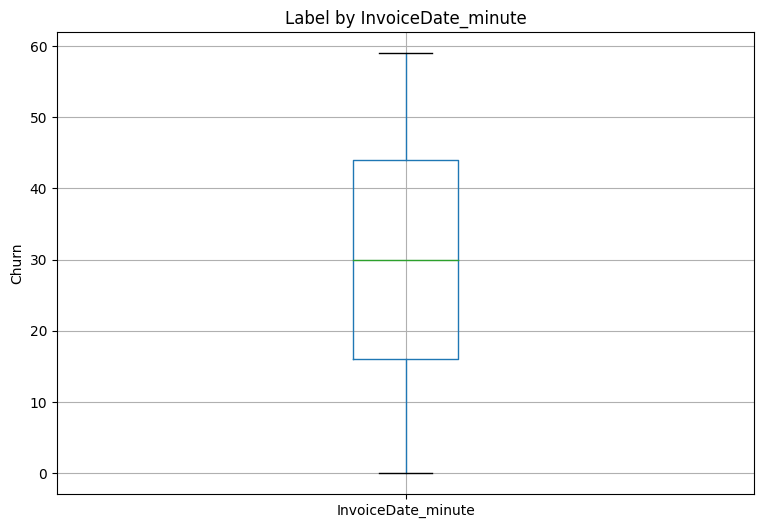

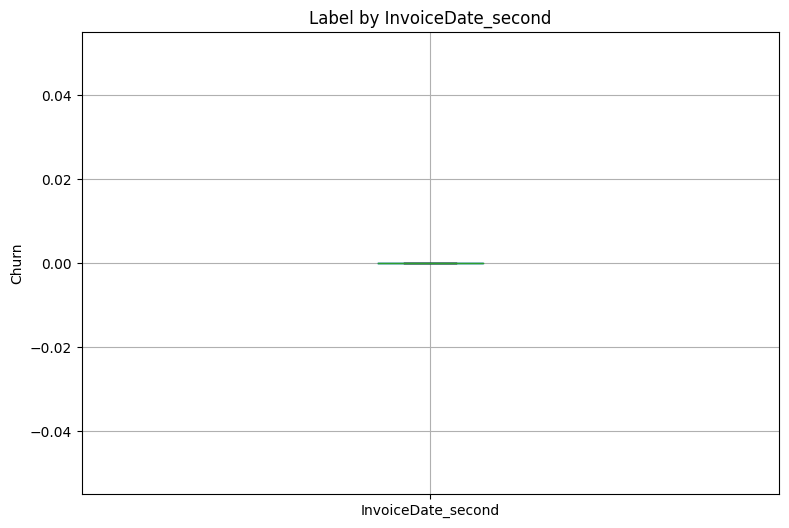

In [40]:
# Chart - 9 visualization code

# plot a boxplot for the label by each numerical feature

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(col)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Churn")
plt.show()

##### 1. Why did I pick the specific chart?

Ans :-
* box plots provide a concise and informative visualization of the distribution, spread, outliers, and skewness of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* Most of the columns are not containing outliers.
* But some columns contain outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth?

Ans :-
Yes with the help of insight which i found from this will help to create business growth.
* The identification of outliers in the data through boxplots can help businesses to identify and address data quality issues.
* By detecting and addressing outliers, businesses can improve the accuracy and reliability of their data, leading to better decision-making and improved business performance.

#### Chart - 10 - Correlation Heatmap

<Axes: >

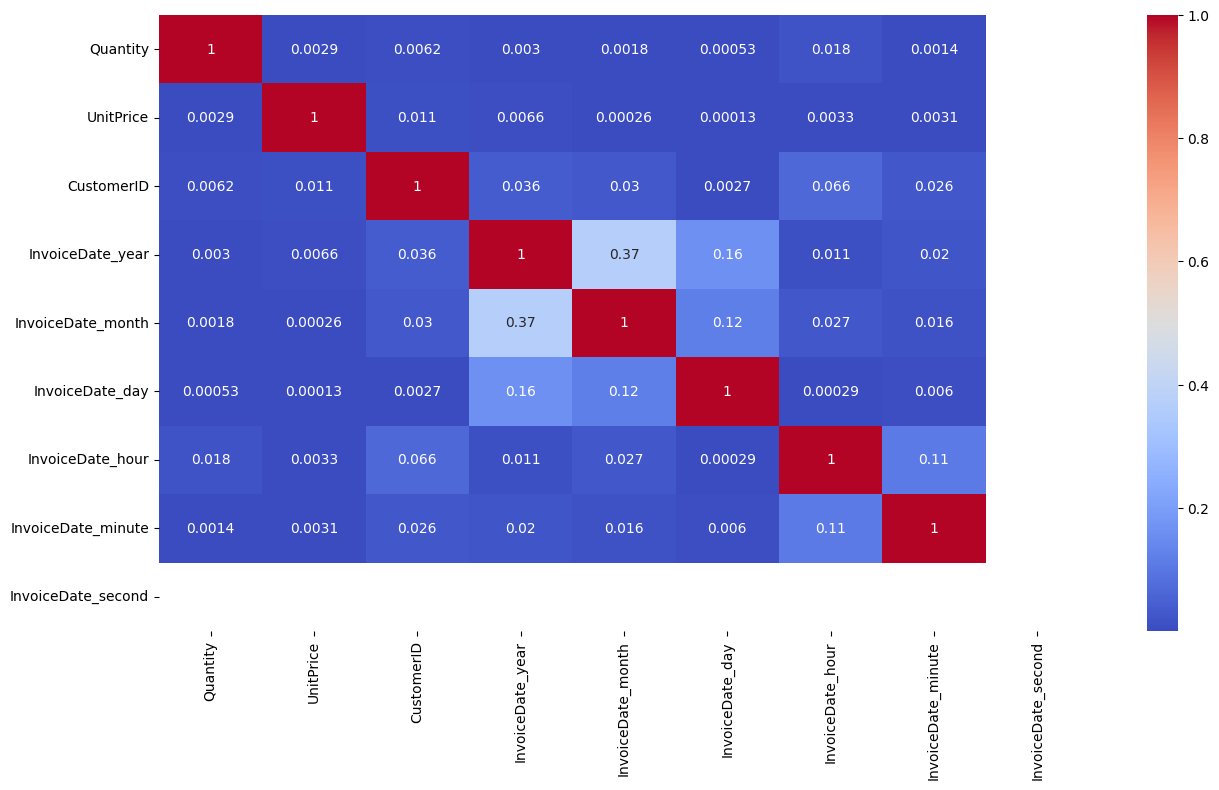

In [41]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did I pick the specific chart?

Ans :-
* I want to see the correlation between all the columns in one go.
* Heat map will give the correlation between columns in a single chart, for this reason i used heatmap.

##### 2. What is/are the insight(s) found from the chart?

Ans :-
* There is positive correlation between InvoiceDate_day and InvoiceDate_month.

* There is positive correlation between InvoiceDate_minute and InvoiceDate_hour.

* Positive correlation between InvoiceDate_hour and InvoiceDate_month.